In [2]:
import pandas as pd

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
df = pd.read_csv(file_path)

# Count the number of notes for each country
country_note_counts = df['Country'].value_counts()

# Convert to a DataFrame for better readability
country_note_counts_df = country_note_counts.reset_index()
country_note_counts_df.columns = ['Country', 'Number of Notes']

# Display the top 5 countries
top_5_countries = country_note_counts_df.head(5)
print(top_5_countries)


   Country  Number of Notes
0  Germany            10074
1    Spain             5583
2  Austria             5038
3   Russia             1243
4   France             1143


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_40604/3075863240.py:5: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
country_note_counts_df.head()

,Country,Number of Notes
0,Germany,10074
1,Spain,5583
2,Austria,5038
3,Russia,1243
4,France,1143
...,...,...
195,Grenada,7
196,Qatar and Dubai,6
197,Dominica,5
198,San Marino,5


In [6]:
import pandas as pd

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
print("First few rows of the dataset:")
print(df.head())

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Display summary statistics for all columns including non-numerical columns
print("\nSummary statistics for all columns:")
print(df.describe(include='all'))

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display the number of notes per country
country_note_counts = df['Country'].value_counts()
print("\nNumber of notes per country:")
print(country_note_counts)

# Convert to a DataFrame for better readability
country_note_counts_df = country_note_counts.reset_index()
country_note_counts_df.columns = ['Country', 'Number of Notes']

# Display the top 5 countries with the number of notes
top_5_countries = country_note_counts_df.head(5)
print("\nTop 5 countries with the number of notes:")
print(top_5_countries)


First few rows of the dataset:
   Unnamed: 0      Country  Reference                                Issuer  \
0           0  Afghanistan     215929  Emirate of Afghanistan (Afghanistan)   
1           1  Afghanistan     216794  Emirate of Afghanistan (Afghanistan)   
2           2  Afghanistan     216036  Emirate of Afghanistan (Afghanistan)   
3           3  Afghanistan     216037  Emirate of Afghanistan (Afghanistan)   
4           4  Afghanistan     216042  Kingdom of Afghanistan (Afghanistan)   

                      Issuing entity            Emir               Type  \
0             Treasury (Afghanistan)  Amanullah Khan  Standard banknote   
1             Treasury (Afghanistan)  Amanullah Khan  Standard banknote   
2             Treasury (Afghanistan)  Amanullah Khan  Standard banknote   
3             Treasury (Afghanistan)  Amanullah Khan  Standard banknote   
4  Ministry of Finance (Afghanistan)             NaN  Standard banknote   

                                  Years    

/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_27141/3662367147.py:5: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [11]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
df = pd.read_csv(file_path)

# Extract the size details (assuming the column is named 'Size')
size_column = 'Size'  # Adjust the column name as necessary
if size_column in df.columns:
    # Drop rows with missing size information
    df_size = df.dropna(subset=[size_column])

    # Parse the dimensions and calculate the length-to-width ratio
    def parse_size(size):
        try:
            length, width = map(float, size.split(' x '))
            return length, width, length / width
        except Exception:
            return None, None, None

    df_size[['Length', 'Width', 'Ratio']] = df_size[size_column].apply(parse_size).apply(pd.Series)

    # Golden ratio and silver ratio
    golden_ratio = 1.618
    silver_ratio = 2.414

    # Check if the ratios are approximately equal to the golden or silver ratio
    df_size['Is_Golden_Ratio'] = df_size['Ratio'].apply(lambda x: abs(x - golden_ratio) < 0.01 if x is not None else False)
    df_size['Is_Silver_Ratio'] = df_size['Ratio'].apply(lambda x: abs(x - silver_ratio) < 0.01 if x is not None else False)

    # Summarize the findings
    golden_ratio_count = df_size['Is_Golden_Ratio'].sum()
    silver_ratio_count = df_size['Is_Silver_Ratio'].sum()

    print(f"Number of notes in the golden ratio: {golden_ratio_count}")
    print(f"Number of notes in the silver ratio: {silver_ratio_count}")

    # Display a few examples
    print("\nExamples of notes in the golden ratio:")
    print(df_size[df_size['Is_Golden_Ratio']].head())

    print("\nExamples of notes in the silver ratio:")
    print(df_size[df_size['Is_Silver_Ratio']].head())
else:
    print(f"The column '{size_column}' is not in the dataset.")


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_27141/2852771685.py:6: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Number of notes in the golden ratio: 0
Number of notes in the silver ratio: 0

Examples of notes in the golden ratio:
Empty DataFrame
Columns: [Unnamed: 0, Country, Reference, Issuer, Issuing entity, Emir, Type, Years, Calendar, Value, Currency, Composition, Size, Shape, Demonetized, Number, References, Photos, Year, King, Issuing bank, Period, Technique, Location, Issuing institution, Co-prince, Queen, Ruling authority, Emperor, Empress, Secondary issuing entity, Regent, Sultan, Prince, Diameter, Issuing company, Grand Prince, Currencies, Grand duke, Duke, Prince elector, Landgrave, President, Shah, Prime minister, Grand duchess, Raja, Pope, Length, Width, Ratio, Is_Golden_Ratio, Is_Silver_Ratio]
Index: []

[0 rows x 53 columns]

Examples of notes in the silver ratio:
Empty DataFrame
Columns: [Unnamed: 0, Country, Reference, Issuer, Issuing entity, Emir, Type, Years, Calendar, Value, Currency, Composition, Size, Shape, Demonetized, Number, References, Photos, Year, King, Issuing bank,

/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_27141/2852771685.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size[['Length', 'Width', 'Ratio']] = df_size[size_column].apply(parse_size).apply(pd.Series)
/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_27141/2852771685.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size[['Length', 'Width', 'Ratio']] = df_size[size_column].apply(parse_size).apply(pd.Series)
/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_271

/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_30645/3526550116.py:6: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


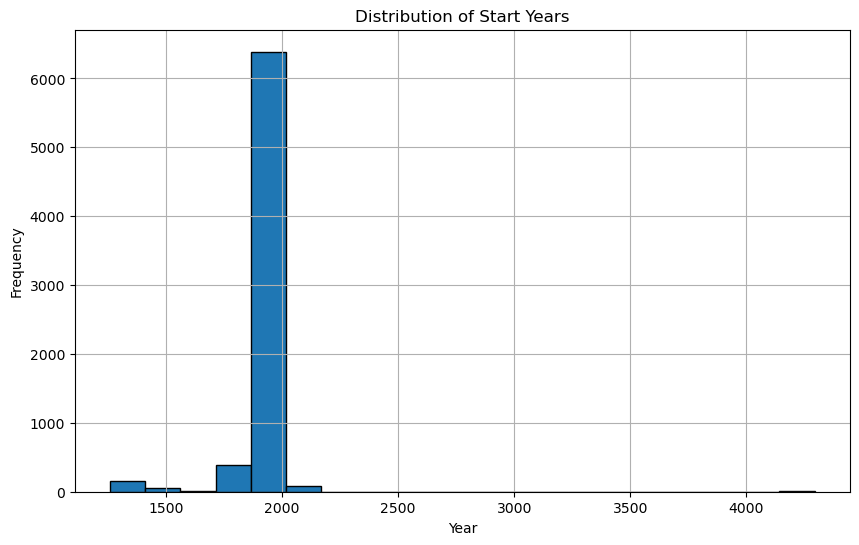

In [2]:
import matplotlib.pyplot as plt

import pandas as pd

file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
data = pd.read_csv(file_path)

data['Start_Year'] = data['Years'].str.extract(r'(\d{4})').astype(float)

# Drop rows where Start_Year is NaN
start_years = data['Start_Year'].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(start_years, bins=20, edgecolor='black')
plt.title('Distribution of Start Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_30645/328452367.py:7: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


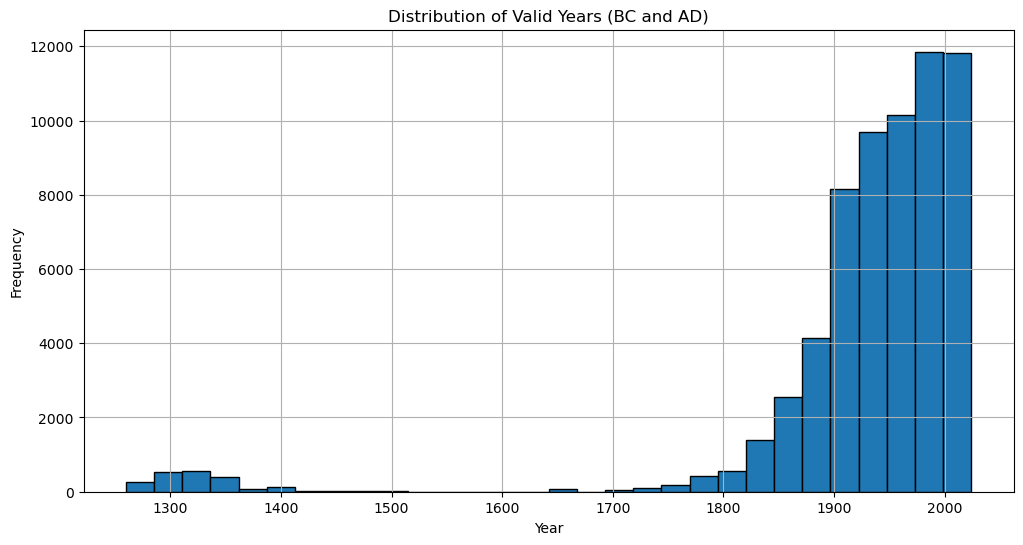

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
data = pd.read_csv(file_path)

# Function to extract years from ranges and denote BC as negative
def extract_years(year_str):
    if pd.isna(year_str):
        return None, None
    year_parts = year_str.split('-')
    if len(year_parts) == 2:
        start_year, end_year = year_parts
    else:
        start_year = year_parts[0]
        end_year = year_parts[-1]
    try:
        start_year, end_year = int(start_year), int(end_year)
        return start_year, end_year
    except ValueError:
        return None, None

# Apply the function to the 'Years' column
data[['Start_Year', 'End_Year']] = data['Years'].apply(lambda x: pd.Series(extract_years(x)))

# Drop rows where Start_Year or End_Year is NaN
filtered_data = data.dropna(subset=['Start_Year', 'End_Year'])

# Flatten the list of years for histogram plotting
years = []
for _, row in filtered_data.iterrows():
    years.extend(range(int(row['Start_Year']), int(row['End_Year']) + 1))

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(years, bins=30, edgecolor='black')
plt.title('Distribution of Valid Years (BC and AD)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


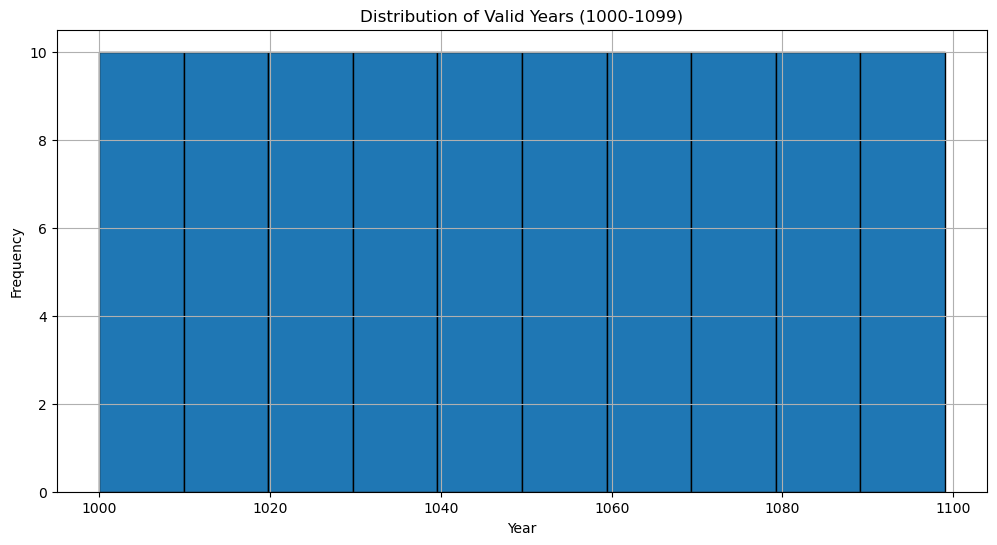

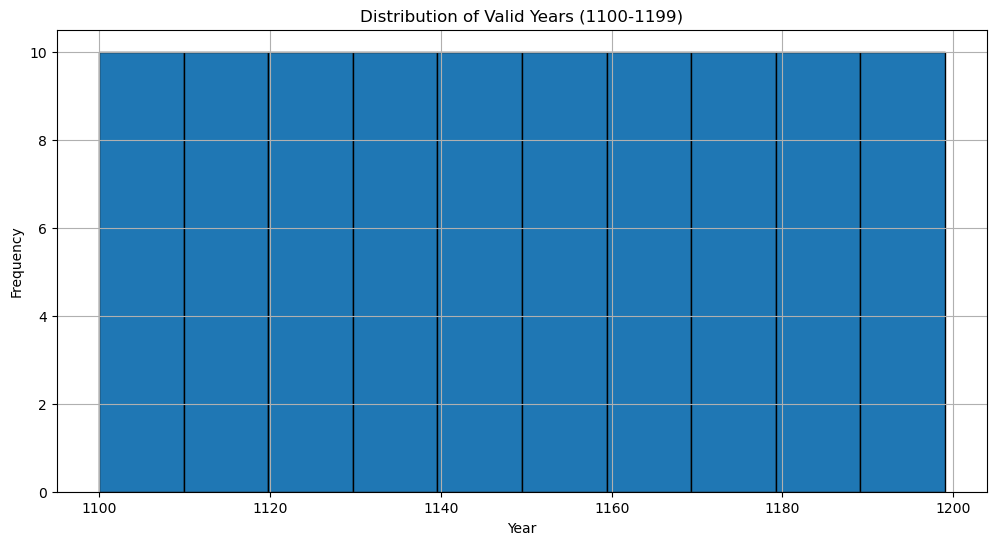

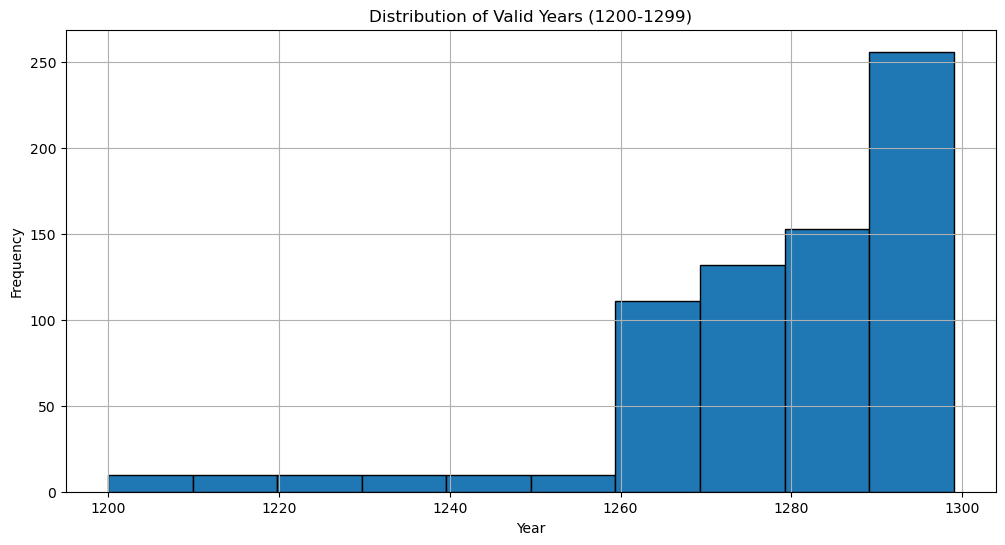

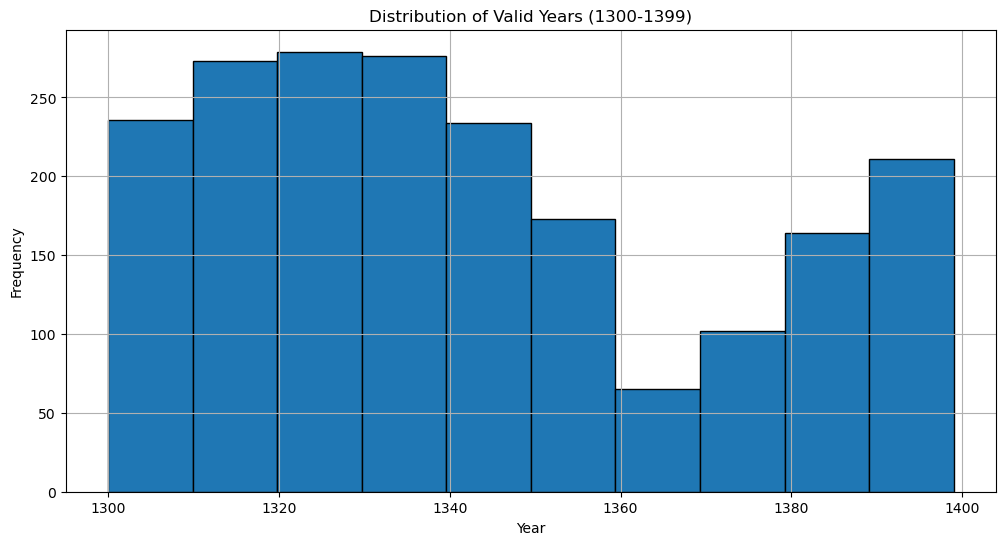

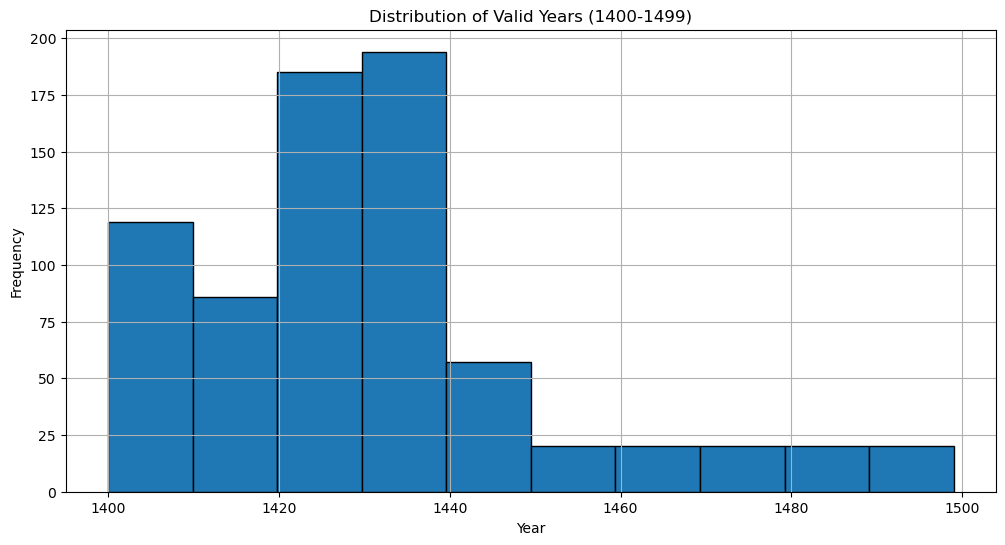

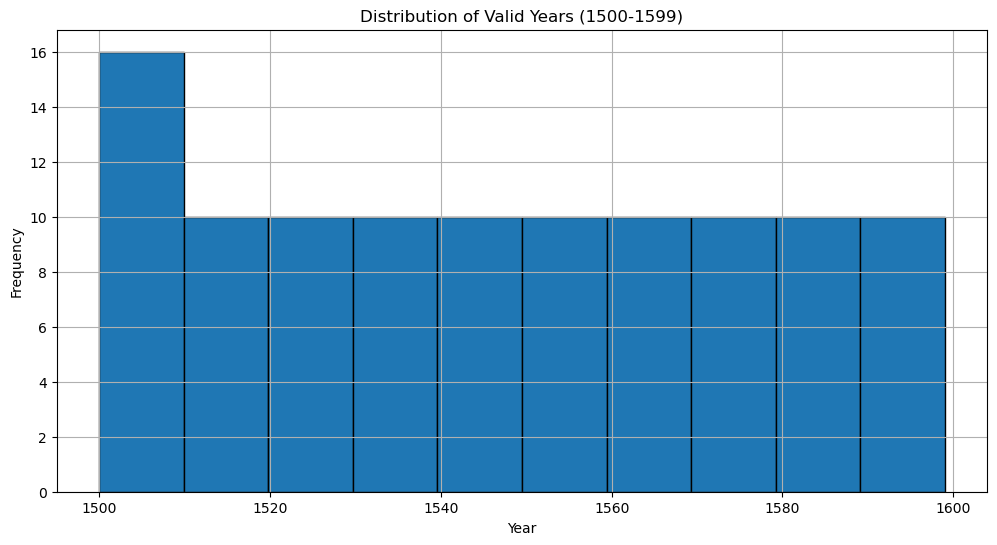

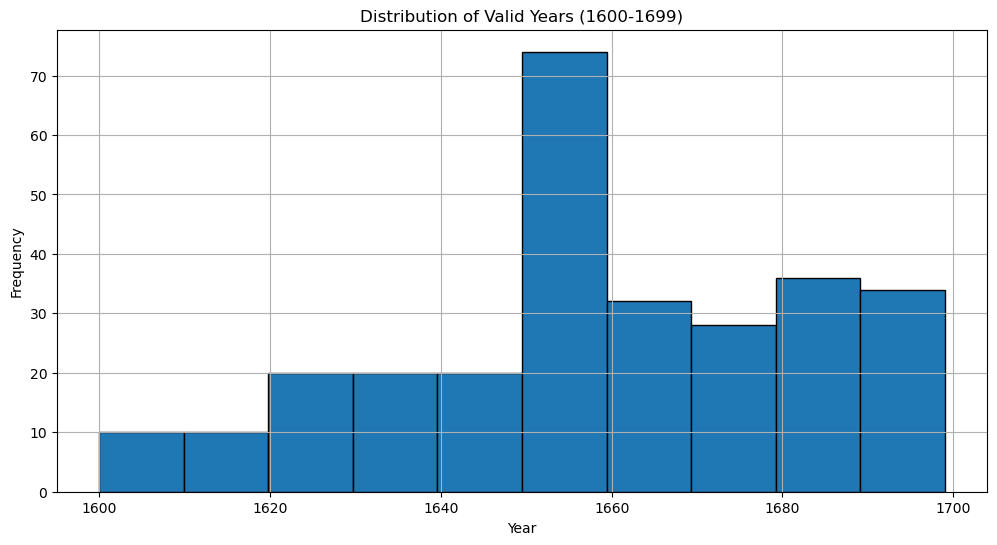

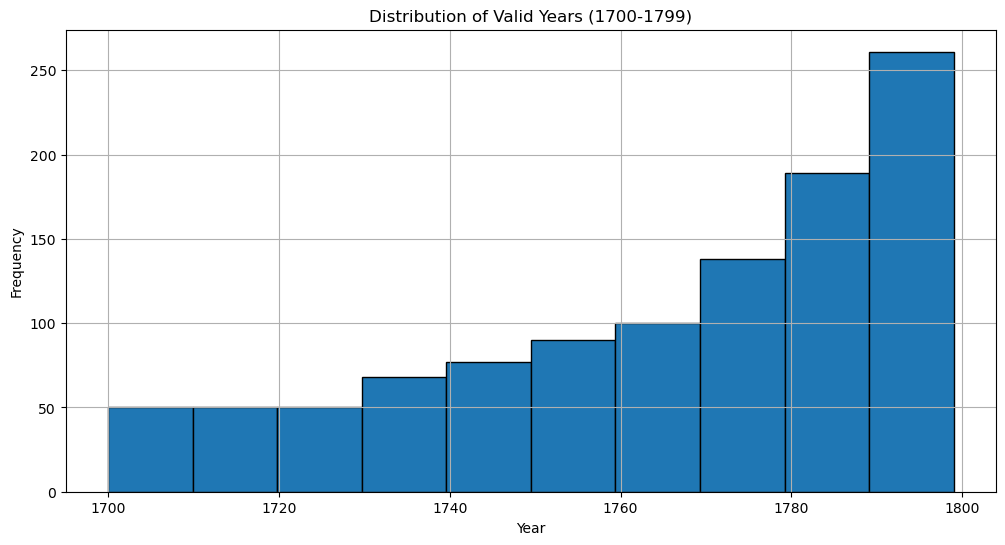

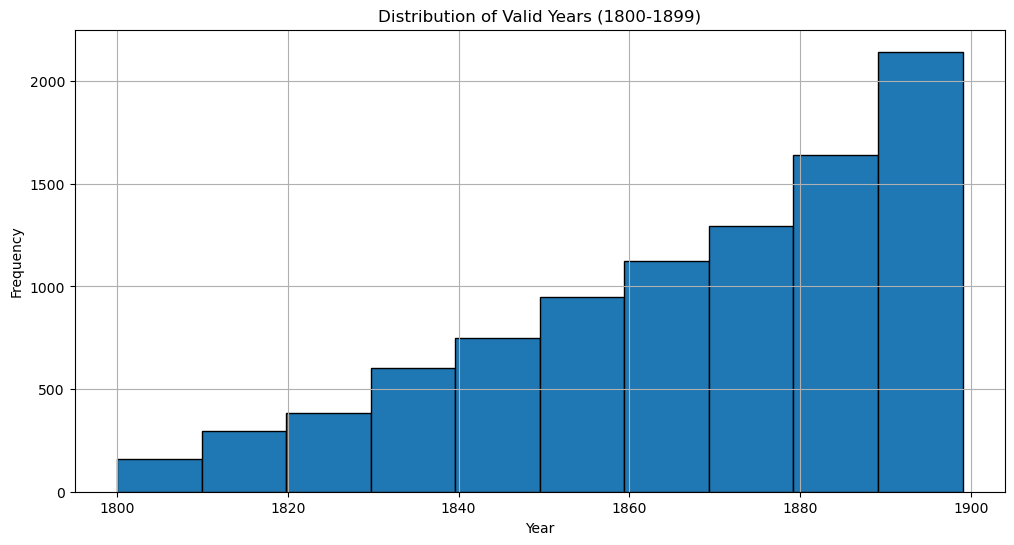

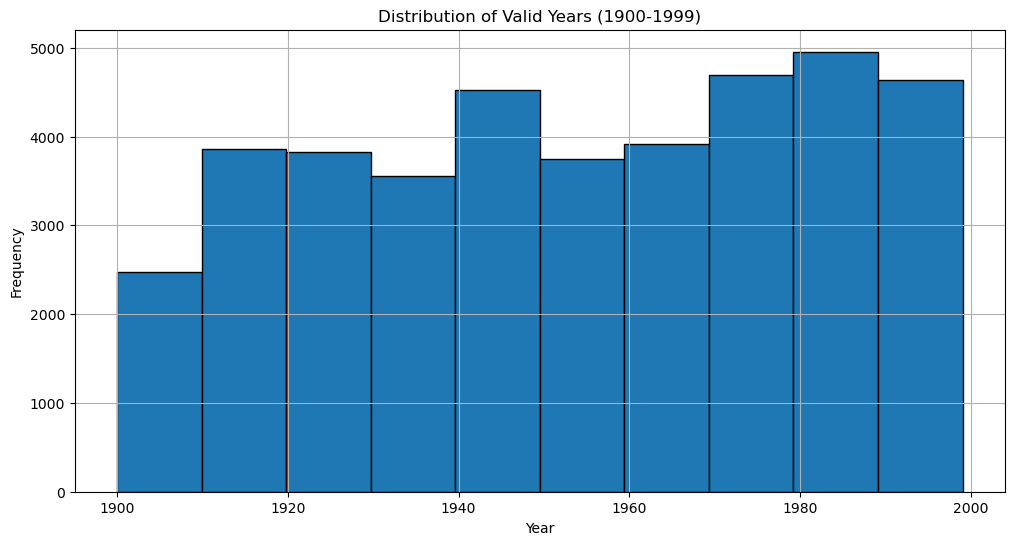

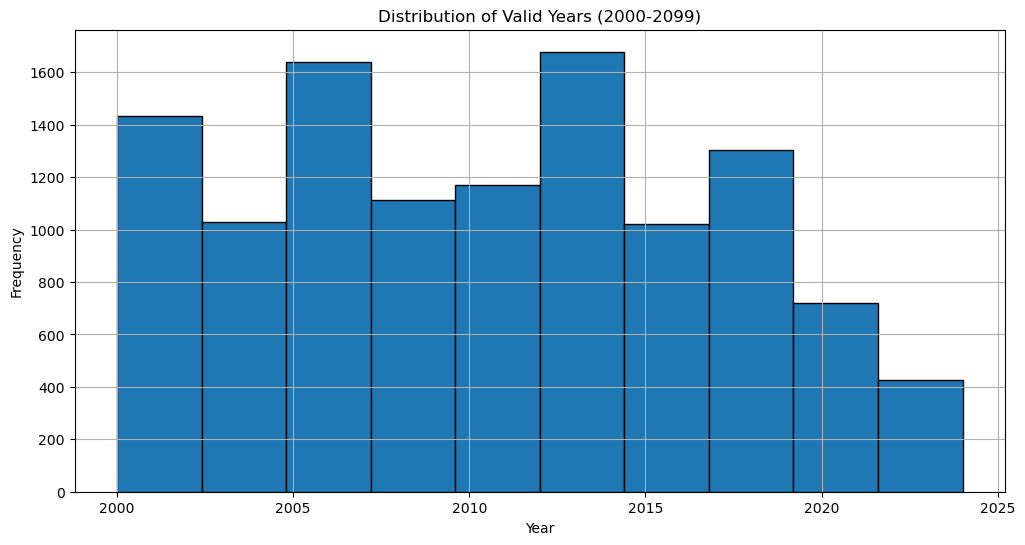

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file with proper settings
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
data = pd.read_csv(file_path, low_memory=False)

# Function to extract years from ranges and denote BC as negative
def extract_years(year_str):
    if pd.isna(year_str):
        return None, None
    if '-' in year_str:
        parts = year_str.split('-')
        if len(parts) >= 2:
            start_year = parts[0]
            end_year = parts[1]
            start_year, end_year = int(re.search(r'\d+', start_year).group()), int(re.search(r'\d+', end_year).group())
            return start_year, end_year
    match = re.search(r'(\d+)', year_str)
    if match:
        year = int(match.group(1))
        if 'BC' in year_str:
            return -year, -year
        return year, year
    return None, None

# Apply the function to the 'Years' column
data[['Start_Year', 'End_Year']] = data['Years'].apply(lambda x: pd.Series(extract_years(x)))

# Drop rows where Start_Year or End_Year is NaN
filtered_data = data.dropna(subset=['Start_Year', 'End_Year'])

# Flatten the list of years for histogram plotting
years = []
for _, row in filtered_data.iterrows():
    years.extend(range(int(row['Start_Year']), int(row['End_Year']) + 1))

# Create a DataFrame from the years
years_df = pd.DataFrame(years, columns=['Year'])

# Define the range for centuries
century_ranges = [(1000, 1099), (1100, 1199), (1200, 1299), (1300, 1399), (1400, 1499),
                  (1500, 1599), (1600, 1699), (1700, 1799), (1800, 1899), (1900, 1999), (2000, 2099)]

# Plotting the histograms for each century
for start, end in century_ranges:
    century_data = years_df[(years_df['Year'] >= start) & (years_df['Year'] <= end)]
    plt.figure(figsize=(12, 6))
    plt.hist(century_data['Year'], bins=10, edgecolor='black')
    plt.title(f'Distribution of Valid Years ({start}-{end})')
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


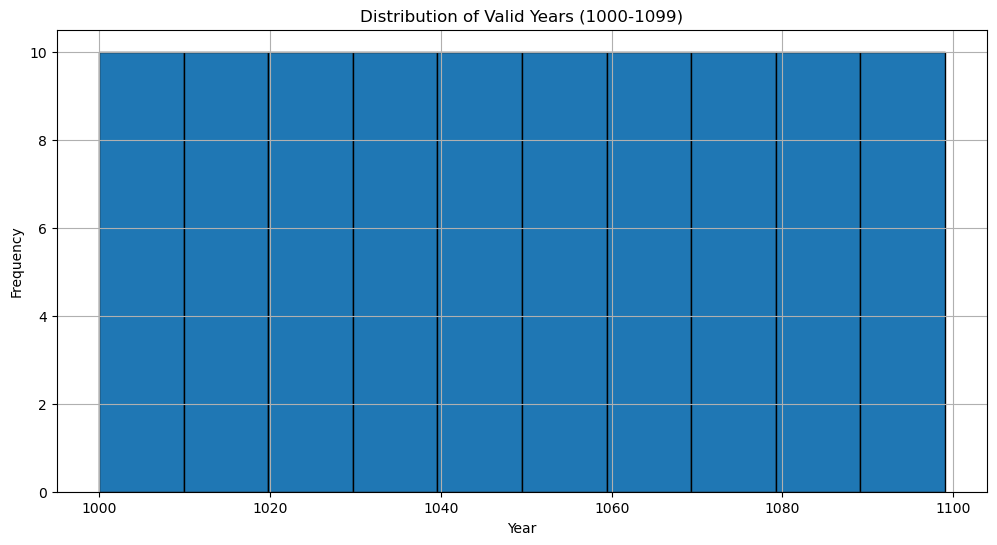

Countries with data in the range 1000-1099:
- France


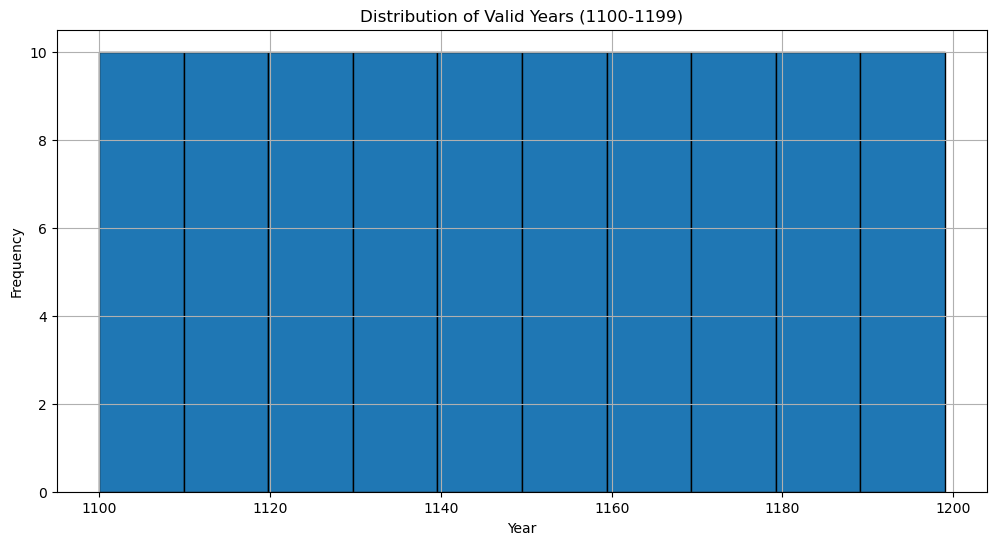

Countries with data in the range 1100-1199:
- France


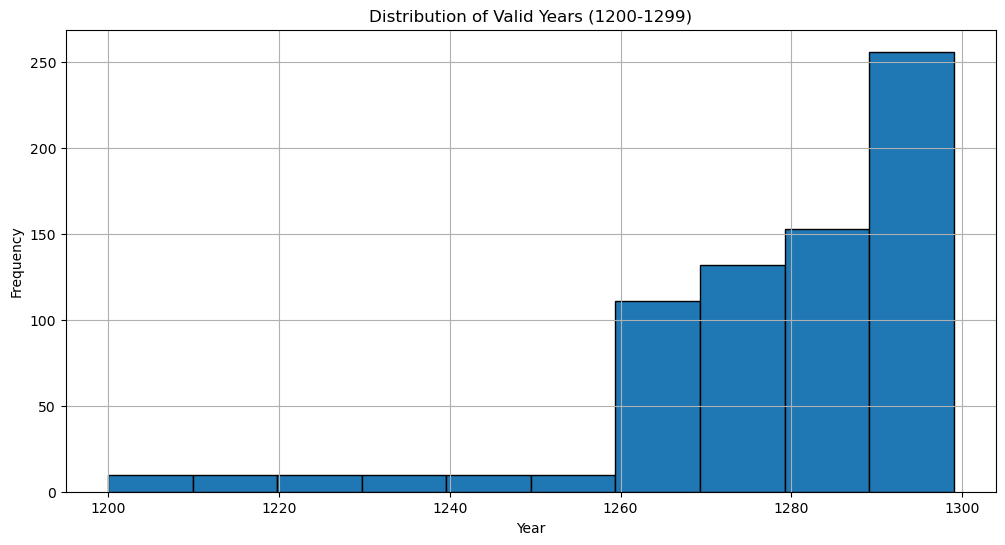

Countries with data in the range 1200-1299:
- Afghanistan
- China
- France
- Iran
- Ottoman Empire


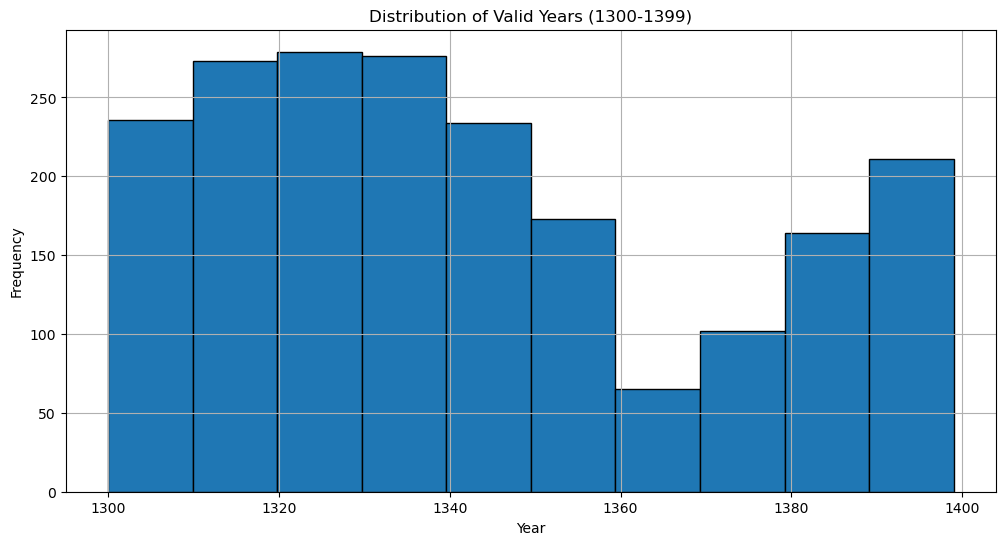

Countries with data in the range 1300-1399:
- Afghanistan
- China
- France
- Iran
- Iraq
- Maldives
- Morocco
- Russia
- Syria


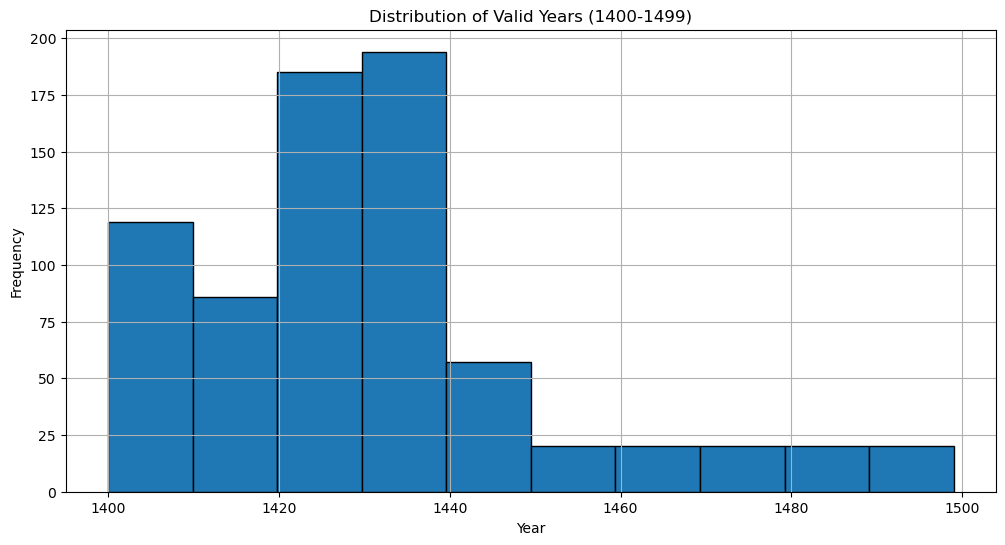

Countries with data in the range 1400-1499:
- Afghanistan
- China
- France
- Iraq
- Jordan
- Maldives
- Morocco
- Oman
- Sudan
- Syria
- United Arab Emirates
- Yemen


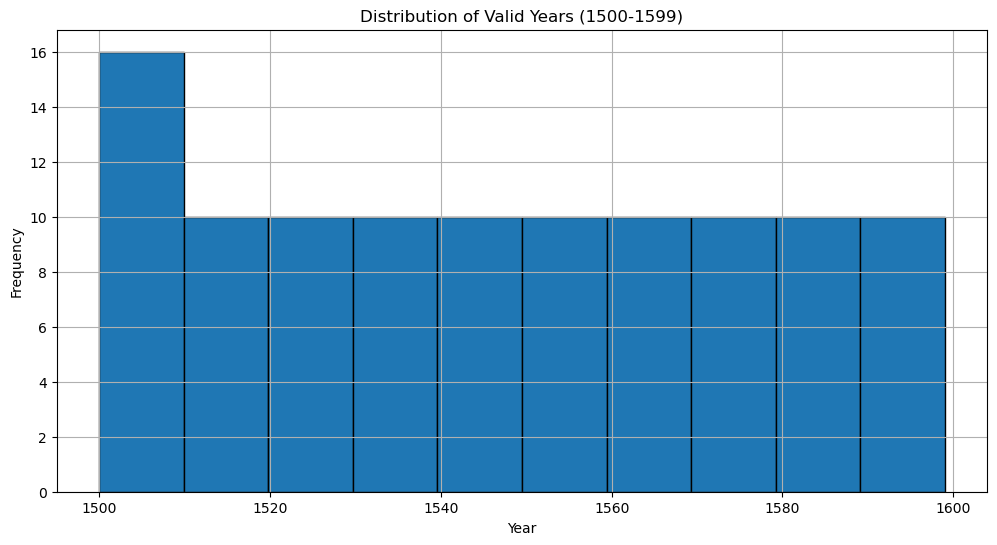

Countries with data in the range 1500-1599:
- China
- France


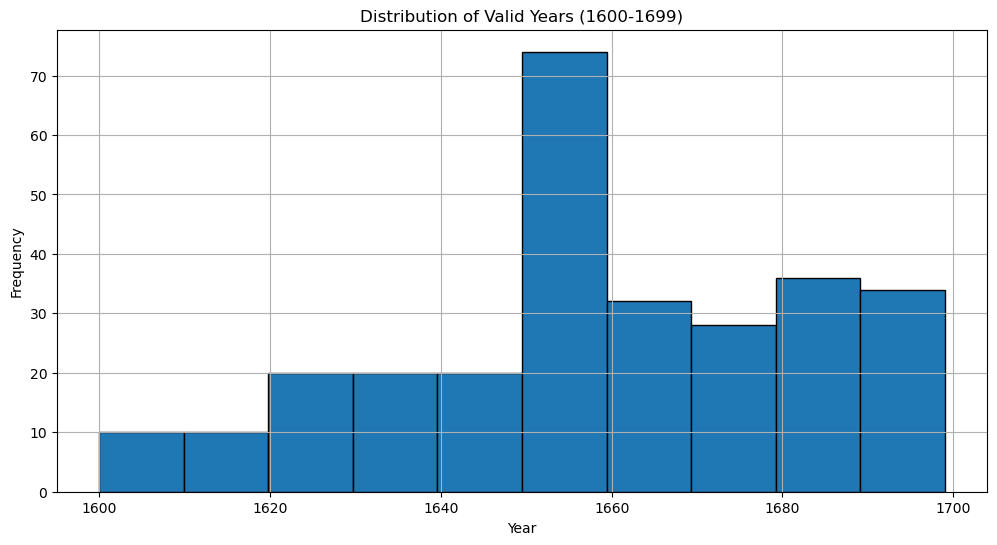

Countries with data in the range 1600-1699:
- Austria
- China
- France


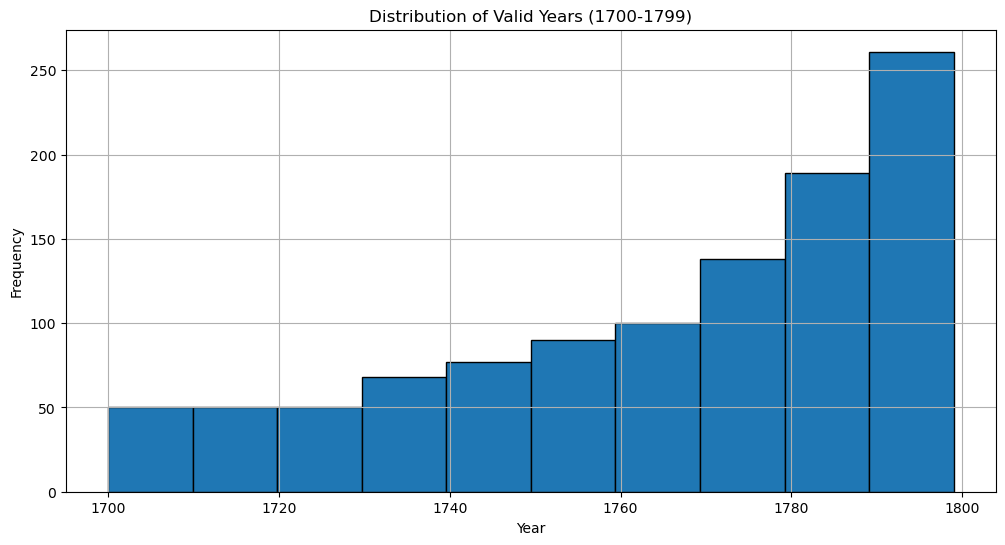

Countries with data in the range 1700-1799:
- Austria
- Brazil
- Denmark
- France
- Haiti
- Iceland
- Japan
- Russia
- Sweden
- United Kingdom, British Overseas Territories and Crown Dependencies
- United States
- Vatican City


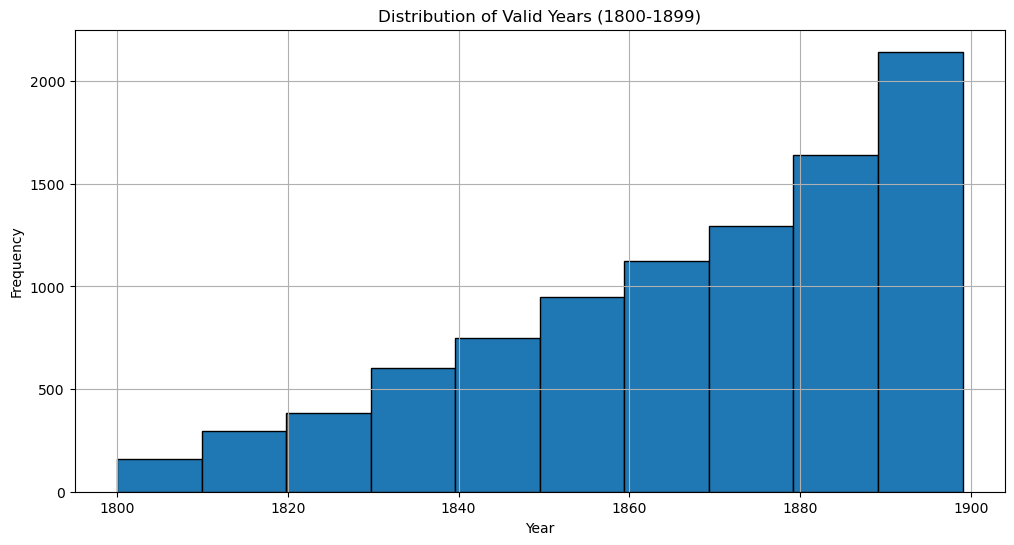

Countries with data in the range 1800-1899:
- Angola
- Argentina
- Australia
- Austria
- Bahamas,
- Barbados
- Belgium
- Belize
- Brazil
- Canada
- Chile
- China
- Colombia
- Cuba
- Denmark
- Ecuador
- Egypt
- El Salvador
- Fiji
- Finland
- France
- French Indochina
- Germany
- Greece
- Guatemala
- Guyana
- Haiti
- Hungary
- Iceland
- India
- Indonesia
- Iran
- Ireland
- Italy
- Jamaica
- Japan
- Liberia
- Madagascar
- Malaysia
- Mauritius
- Mexico
- Netherlands
- New Zealand
- Nicaragua
- Norway
- Ottoman Empire
- Paraguay
- Philippines
- Portugal
- Romania
- Russia
- Senegal
- Serbia
- South Africa
- Suriname
- Sweden
- Switzerland
- Thailand
- United Kingdom, British Overseas Territories and Crown Dependencies
- United States


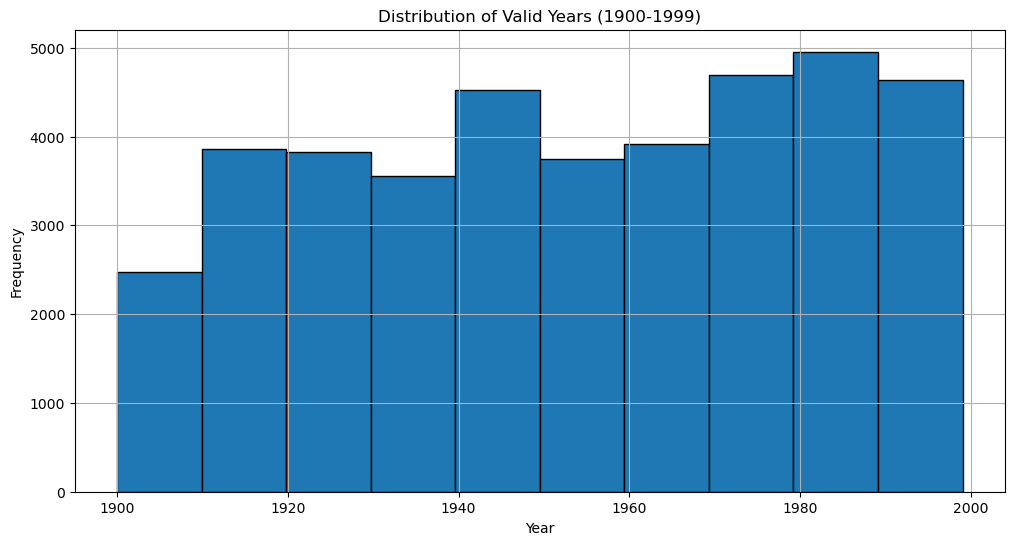

Countries with data in the range 1900-1999:
- Afghanistan
- Albania
- Algeria
- Angola
- Antigua and Barbuda
- Argentina
- Australia
- Austria
- Azerbaijan
- Bahamas,
- Bahrain
- Bangladesh
- Barbados
- Belgian Congo, Rwanda and Urundi
- Belgium
- Belize
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- British West Africa
- Brunei
- Bulgaria
- Burundi
- Cambodia
- Cameroon
- Canada
- Cape Verde
- Central African Republic
- Central African States
- Chad
- Chile
- China
- Colombia
- Comoro Islands
- Congo,
- Costa Rica
- Cuba
- Cyprus
- Czechoslovakia
- Denmark
- Djibouti
- Dominica
- Dominican Republic
- East Africa
- Eastern Caribbean States
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Estonia
- Eswatini
- Ethiopia
- Fiji
- France
- French Indochina
- French West Africa
- Gabon
- Gambia,
- Georgia
- German East Africa
- Germany
- Ghana
- Greece
- Grenada
- Guatemala
- Guinea
- Guinea-Bissau
- Guyana
- Haiti
- Honduras
- Hungary
- Iceland
- India
- Indonesia
- 

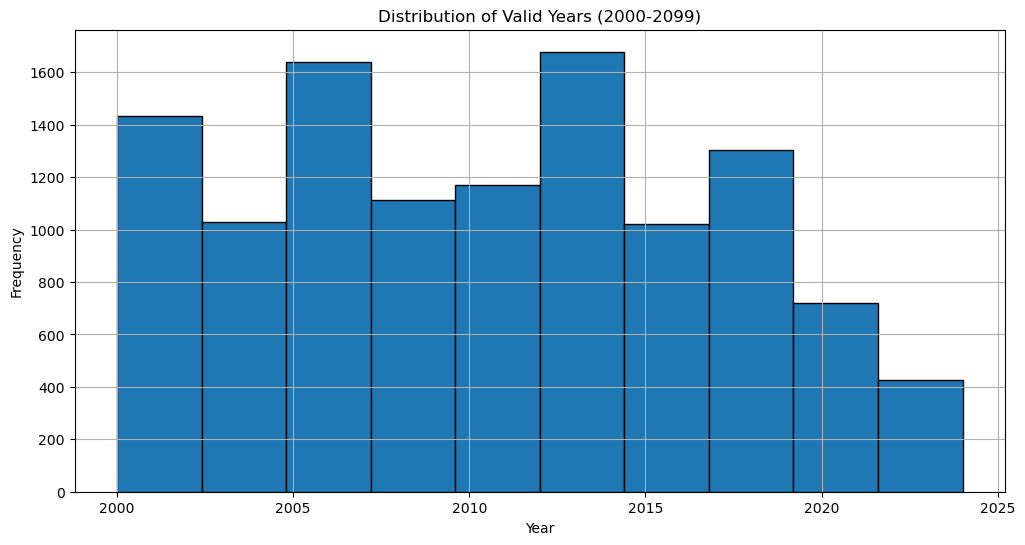

Countries with data in the range 2000-2099:
- Albania
- Angola
- Argentina
- Armenia
- Australia
- Azerbaijan
- Bahamas,
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burundi
- Cambodia
- Canada
- Cape Verde
- Central African States
- Chile
- China
- Colombia
- Comoro Islands
- Congo,
- Costa Rica
- Croatia
- Cuba
- Cyprus
- Czech Republic
- Denmark
- Djibouti
- Dominican Republic
- Eastern Caribbean States
- Egypt
- Estonia
- Eswatini
- Ethiopia
- Eurozone
- Fiji
- France
- Gambia,
- Georgia
- Ghana
- Guatemala
- Guinea
- Guyana
- Haiti
- Honduras
- Hungary
- Iceland
- India
- Indonesia
- Iran
- Ireland
- Israel
- Italy
- Jamaica
- Japan
- Jordan
- Kazakhstan
- Kenya
- Kyrgyzstan
- Laos
- Latvia
- Lebanon
- Lesotho
- Liberia
- Madagascar
- Malawi
- Malaysia
- Malta
- Mauritania
- Mauritius
- Mexico
- Moldova
- Mongolia
- Montenegro
- Mozambique
- Namibia
- Nepal
- Netherlands
- New Zealand
- N

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file with proper settings
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
data = pd.read_csv(file_path, low_memory=False)

# Function to extract years from ranges and denote BC as negative
def extract_years(year_str):
    if pd.isna(year_str):
        return None, None
    if '-' in year_str:
        parts = year_str.split('-')
        if len(parts) >= 2:
            start_year = parts[0]
            end_year = parts[1]
            start_year, end_year = int(re.search(r'\d+', start_year).group()), int(re.search(r'\d+', end_year).group())
            return start_year, end_year
    match = re.search(r'(\d+)', year_str)
    if match:
        year = int(match.group(1))
        if 'BC' in year_str:
            return -year, -year
        return year, year
    return None, None

# Apply the function to the 'Years' column
data[['Start_Year', 'End_Year']] = data['Years'].apply(lambda x: pd.Series(extract_years(x)))

# Drop rows where Start_Year or End_Year is NaN
filtered_data = data.dropna(subset=['Start_Year', 'End_Year'])

# Create a DataFrame for years and associated countries
years_countries = []
for _, row in filtered_data.iterrows():
    country = row['Country']
    for year in range(int(row['Start_Year']), int(row['End_Year']) + 1):
        years_countries.append((year, country))

years_countries_df = pd.DataFrame(years_countries, columns=['Year', 'Country'])

# Define the range for centuries
century_ranges = [(1000, 1099), (1100, 1199), (1200, 1299), (1300, 1399), (1400, 1499),
                  (1500, 1599), (1600, 1699), (1700, 1799), (1800, 1899), (1900, 1999), (2000, 2099)]

# Plotting the histograms for each century with associated countries
for start, end in century_ranges:
    century_data = years_countries_df[(years_countries_df['Year'] >= start) & (years_countries_df['Year'] <= end)]
    
    if not century_data.empty:
        plt.figure(figsize=(12, 6))
        plt.hist(century_data['Year'], bins=10, edgecolor='black')
        plt.title(f'Distribution of Valid Years ({start}-{end})')
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Print the countries associated with the century range
        century_countries = century_data['Country'].unique()
        print(f'Countries with data in the range {start}-{end}:')
        for country in century_countries:
            print(f'- {country}')


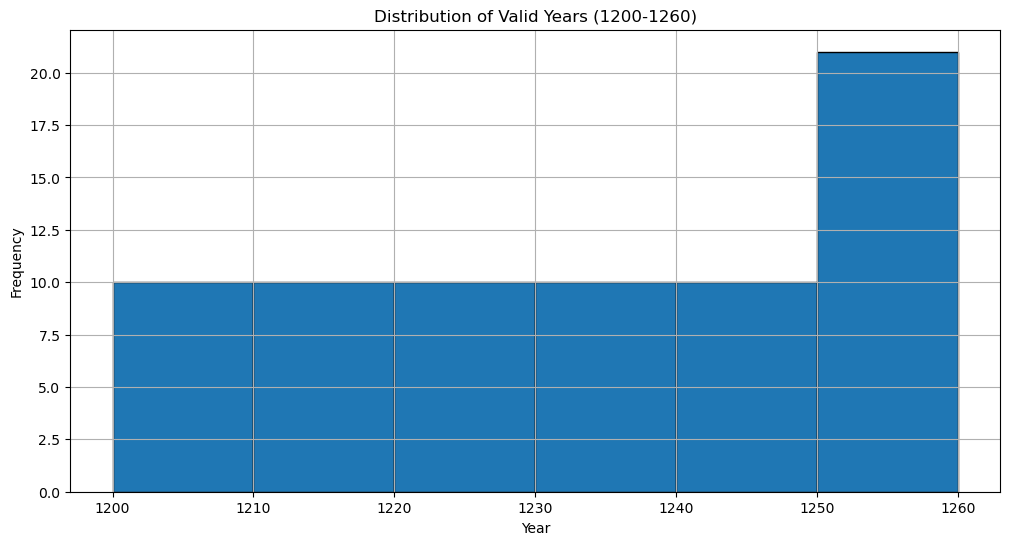

Countries with data in the range 1200-1260:
- China
- France


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the CSV file with proper settings
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
data = pd.read_csv(file_path, low_memory=False)

# Function to extract years from ranges and denote BC as negative
def extract_years(year_str):
    if pd.isna(year_str):
        return None, None
    if '-' in year_str:
        parts = year_str.split('-')
        if len(parts) >= 2:
            start_year = parts[0]
            end_year = parts[1]
            start_year, end_year = int(re.search(r'\d+', start_year).group()), int(re.search(r'\d+', end_year).group())
            return start_year, end_year
    match = re.search(r'(\d+)', year_str)
    if match:
        year = int(match.group(1))
        if 'BC' in year_str:
            return -year, -year
        return year, year
    return None, None

# Apply the function to the 'Years' column
data[['Start_Year', 'End_Year']] = data['Years'].apply(lambda x: pd.Series(extract_years(x)))

# Drop rows where Start_Year or End_Year is NaN
filtered_data = data.dropna(subset=['Start_Year', 'End_Year'])

# Create a DataFrame for years and associated countries
years_countries = []
for _, row in filtered_data.iterrows():
    country = row['Country']
    for year in range(int(row['Start_Year']), int(row['End_Year']) + 1):
        years_countries.append((year, country))

years_countries_df = pd.DataFrame(years_countries, columns=['Year', 'Country'])

# Define the range for centuries
century_ranges = [(1200, 1260)]

# Plotting the histograms for each century with associated countries
for start, end in century_ranges:
    century_data = years_countries_df[(years_countries_df['Year'] >= start) & (years_countries_df['Year'] <= end)]
    
    if not century_data.empty:
        plt.figure(figsize=(12, 6))
        plt.hist(century_data['Year'], bins=6, edgecolor='black')
        plt.title(f'Distribution of Valid Years ({start}-{end})')
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        
        # Print the countries associated with the century range
        century_countries = century_data['Country'].unique()
        print(f'Countries with data in the range {start}-{end}:')
        for country in century_countries:
            print(f'- {country}')


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_30645/2625252216.py:6: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


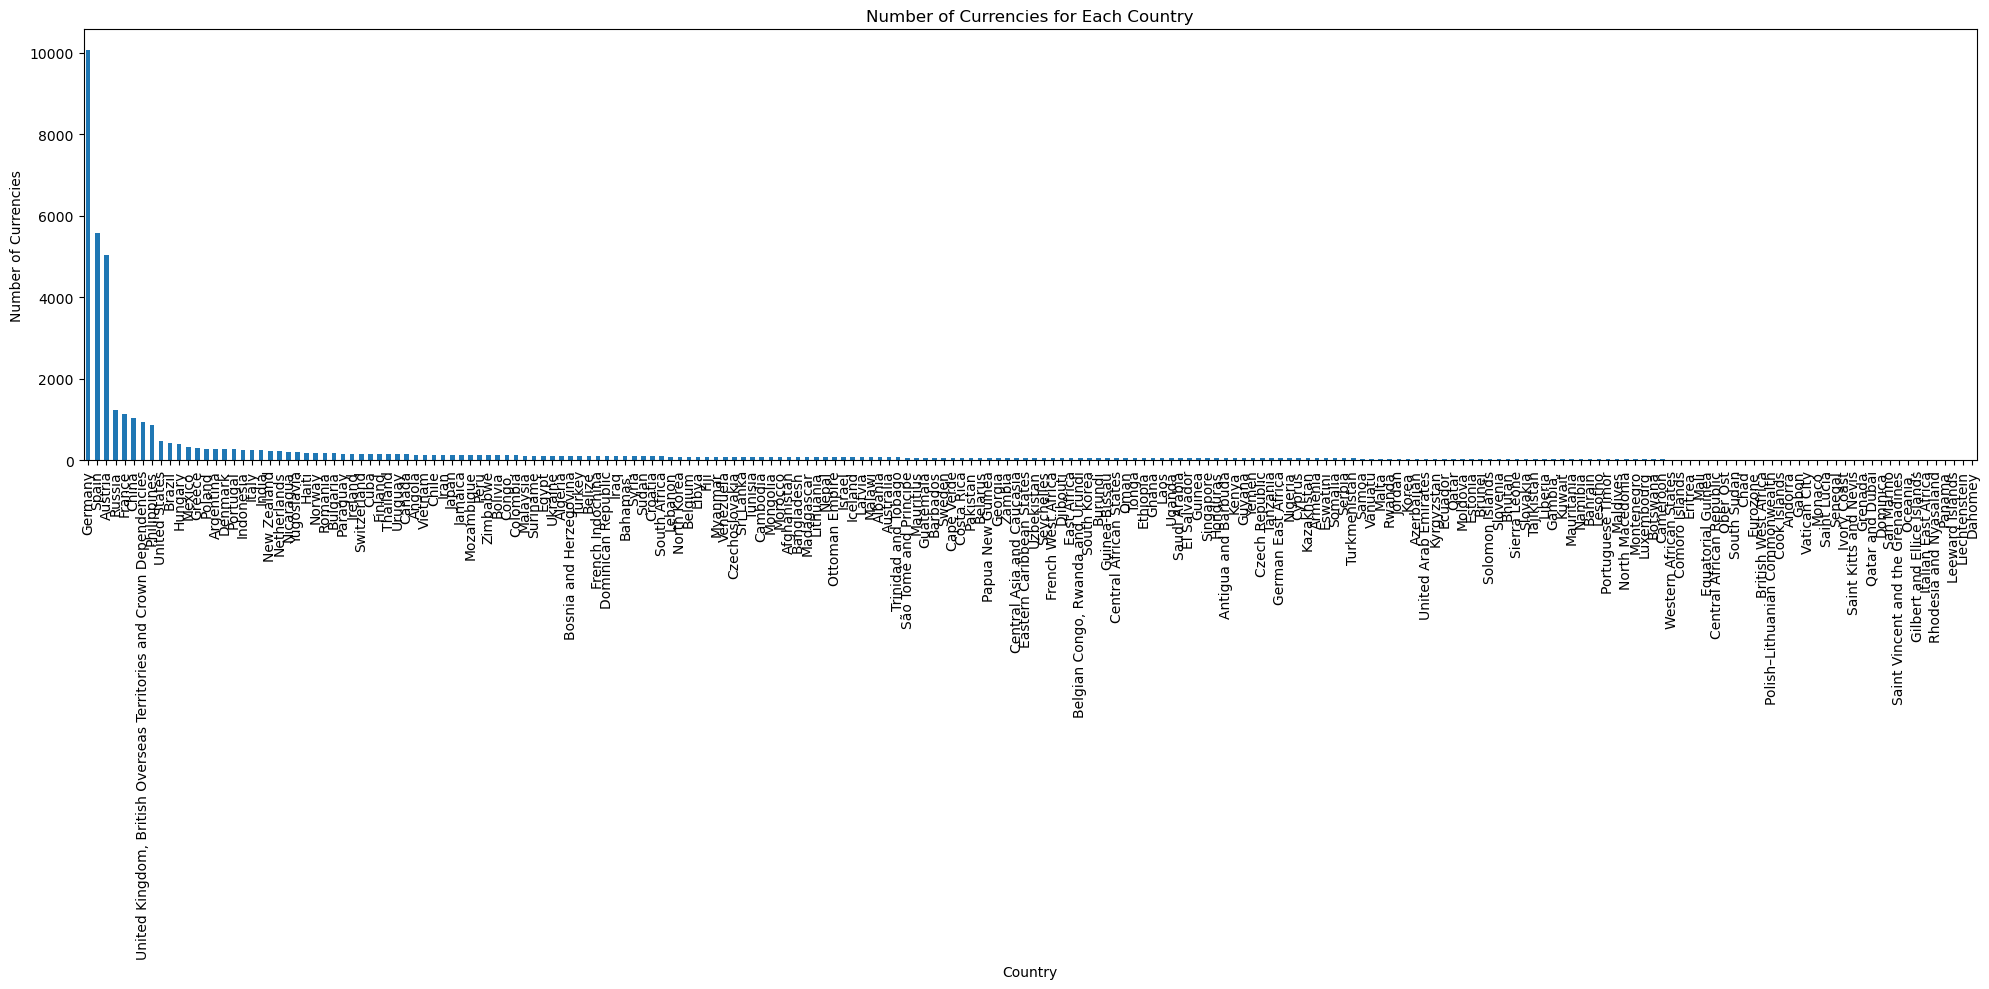

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
df = pd.read_csv(file_path)

# Count the number of currencies for each country
country_currency_counts = df['Country'].value_counts()

# Plot a histogram
plt.figure(figsize=(20, 10))
country_currency_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Currencies')
plt.title('Number of Currencies for Each Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_30645/3310928983.py:6: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


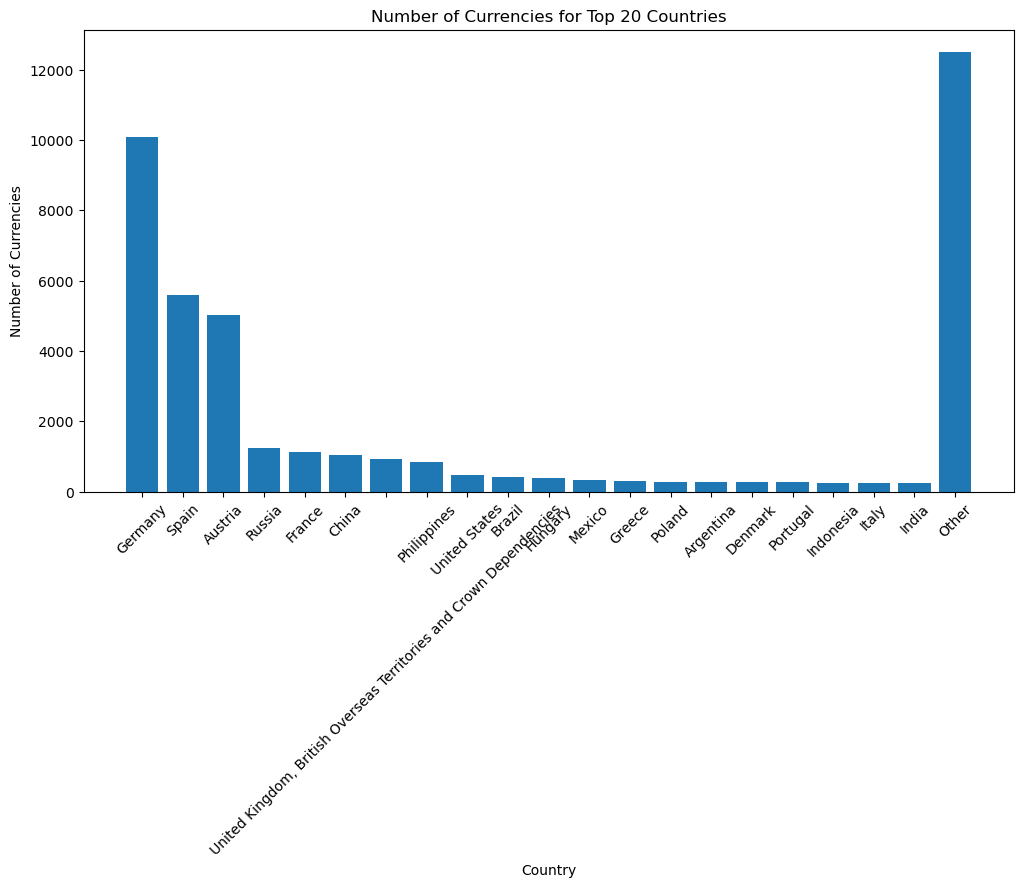

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
df = pd.read_csv(file_path)

# Count the number of currencies for each country
country_currency_counts = df['Country'].value_counts()

# Select top 20 countries
top_countries = country_currency_counts.head(20)
# Aggregate the rest into 'Other' category
other_count = country_currency_counts.iloc[20:].sum()

# Create a new DataFrame with top countries and 'Other'
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Number of Currencies']
other_df = pd.DataFrame({'Country': ['Other'], 'Number of Currencies': [other_count]})
top_countries_df = pd.concat([top_countries_df, other_df], ignore_index=True)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries_df['Country'], top_countries_df['Number of Currencies'])
plt.xlabel('Country')
plt.ylabel('Number of Currencies')
plt.title('Number of Currencies for Top 20 Countries')
plt.xticks(rotation=45)
plt.show()


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_30645/3242672350.py:6: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


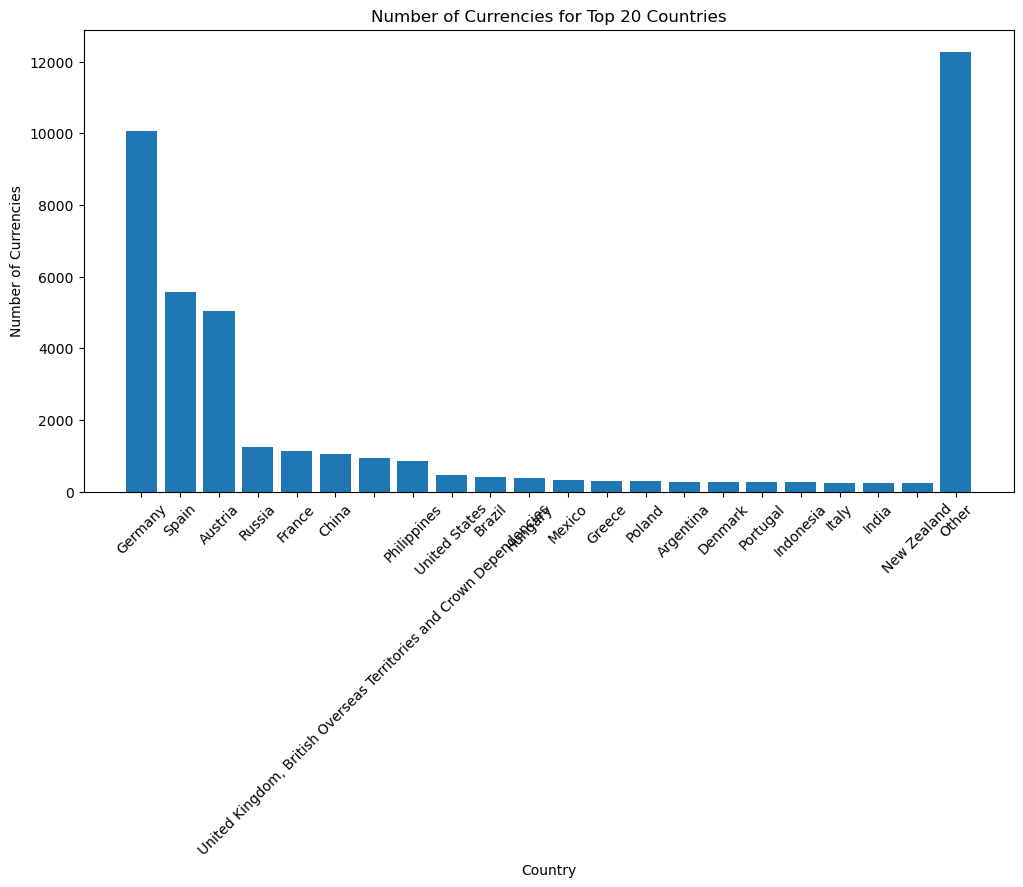

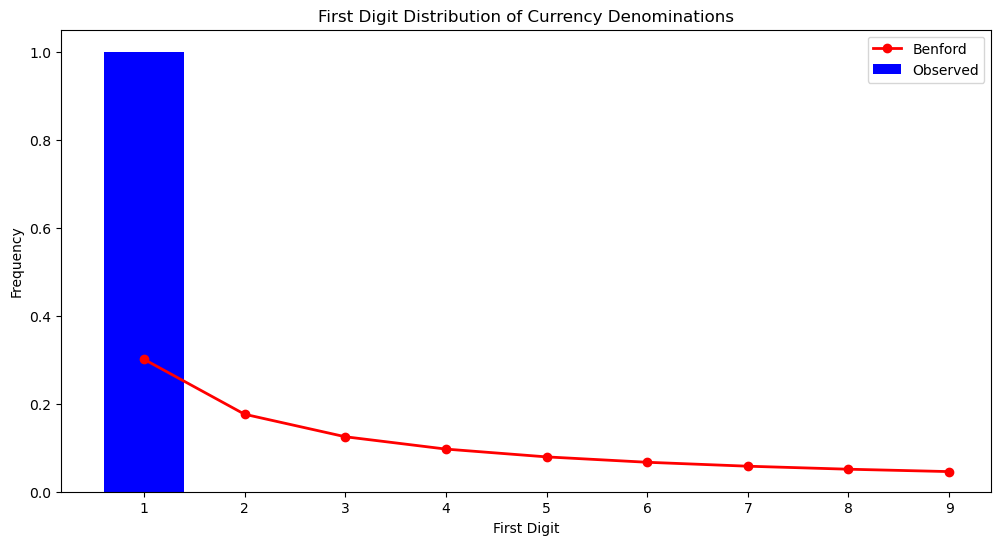

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = {
    'Country': ['Afghanistan'],
    'Value': ['1 Rupee'],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Extract the first digit of each currency value
def first_digit(x):
    while x >= 10:
        x /= 10
    return int(x)

df['FirstDigit'] = df['Value'].apply(lambda x: first_digit(int(x.split()[0])))

# Count the frequency of each first digit
first_digit_counts = df['FirstDigit'].value_counts()

# Calculate the expected frequencies from Benford's Law
benford = [np.log10(1 + 1/d) for d in range(1, 10)]

# Plot the observed and expected frequencies
plt.figure(figsize=(12, 6))
plt.bar(first_digit_counts.index, first_digit_counts.values, color='b', label='Observed')
plt.plot(range(1, 10), [count * len(df) / sum(first_digit_counts.values) for count in benford], color='r', marker='o', linestyle='-', linewidth=2, label='Benford')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('First Digit Distribution of Currency Denominations')
plt.xticks(range(1, 10))
plt.legend()
plt.show()


/var/folders/64/p6smn7z55_n1hbvv5ps_01z80000gn/T/ipykernel_30645/3588292202.py:7: DtypeWarning: Columns (5,25,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


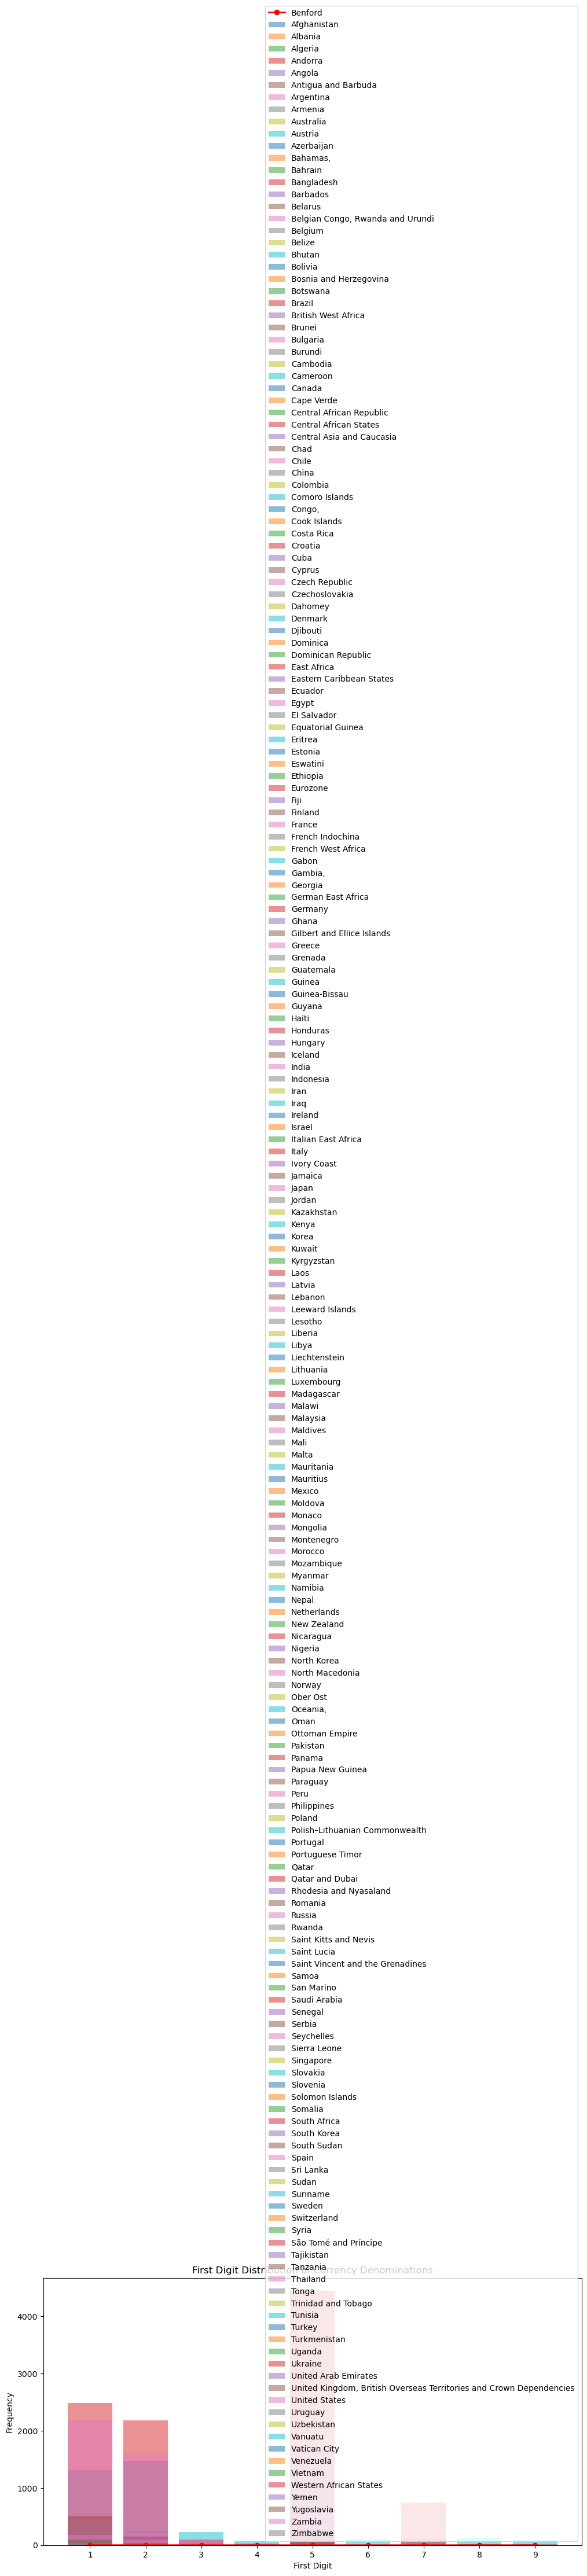

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = '/Users/tharunyakatikireddy/Documents/Project/country_with_url_pages_notes_features.csv'
df = pd.read_csv(file_path)

# Extract the first digit of each currency value
def first_digit(x):
    x_str = str(x)  # Convert to string to handle float values
    numeric_part = ''.join(filter(str.isdigit, x_str.split()[0]))
    if not numeric_part:
        return None
    x = float(numeric_part)  # Convert to float to handle decimal values
    while x >= 10:
        x /= 10
    return int(x)

df['FirstDigit'] = df['Value'].apply(lambda x: first_digit(x))

# Count the frequency of each first digit for each country
first_digit_counts = df.groupby('Country')['FirstDigit'].value_counts().unstack().fillna(0)

# Calculate the expected frequencies from Benford's Law
benford = [np.log10(1 + 1/d) for d in range(1, 10)]

# Plot the observed and expected frequencies for each country
plt.figure(figsize=(12, 6))
for country in first_digit_counts.index:
    plt.bar(first_digit_counts.columns, first_digit_counts.loc[country], alpha=0.5, label=country)

plt.plot(range(1, 10), [count * len(df) / sum(first_digit_counts.sum(axis=1)) for count in benford], color='r', marker='o', linestyle='-', linewidth=2, label='Benford')
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.title('First Digit Distribution of Currency Denominations')
plt.xticks(range(1, 10))
plt.legend()
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1, alpha=0.8)
plt.show()


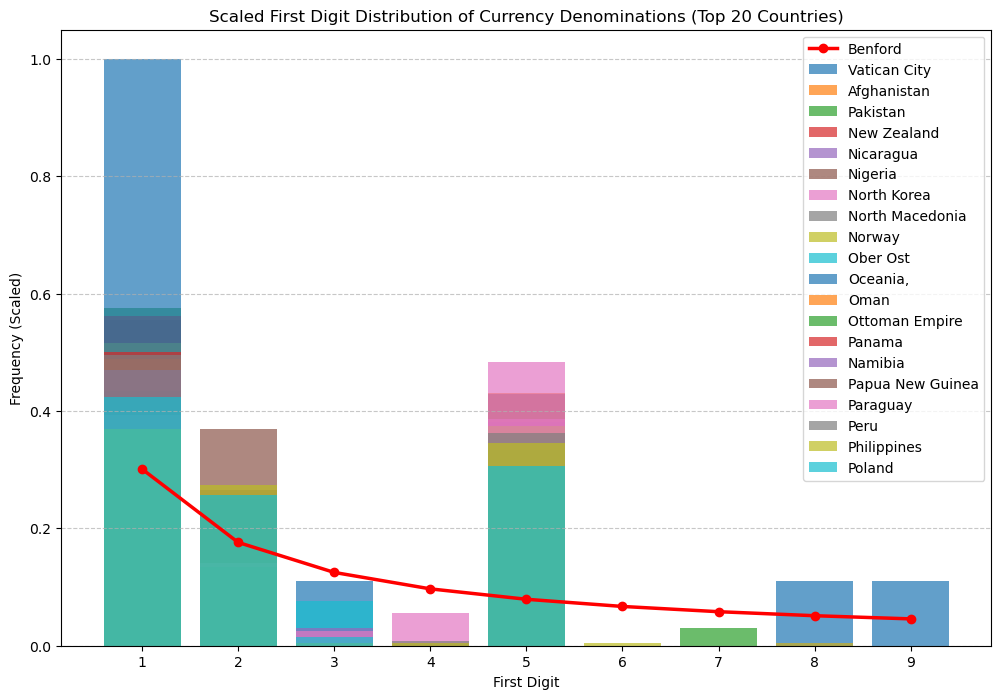

In [39]:
# Calculate total number of observations for each country
total_observations = first_digit_counts.sum(axis=1)

# Scale the frequencies from 0 to 1 for each country
scaled_data = first_digit_counts.divide(total_observations, axis=0)

# Select the top 20 countries
top_20_countries = scaled_data.sum(axis=1).sort_values(ascending=False).head(20).index
top_20_data = scaled_data.loc[top_20_countries]

# Plot the scaled frequencies for the top 20 countries
plt.figure(figsize=(12, 8))
for country in top_20_data.index:
    plt.bar(top_20_data.columns, top_20_data.loc[country], alpha=0.7, label=country)

# Plot the expected frequencies from Benford's Law
plt.plot(range(1, 10), benford, color='r', marker='o', linestyle='-', linewidth=2.5, label='Benford')

plt.xlabel('First Digit')
plt.ylabel('Frequency (Scaled)')
plt.title('Scaled First Digit Distribution of Currency Denominations (Top 20 Countries)')
plt.xticks(range(1, 10))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


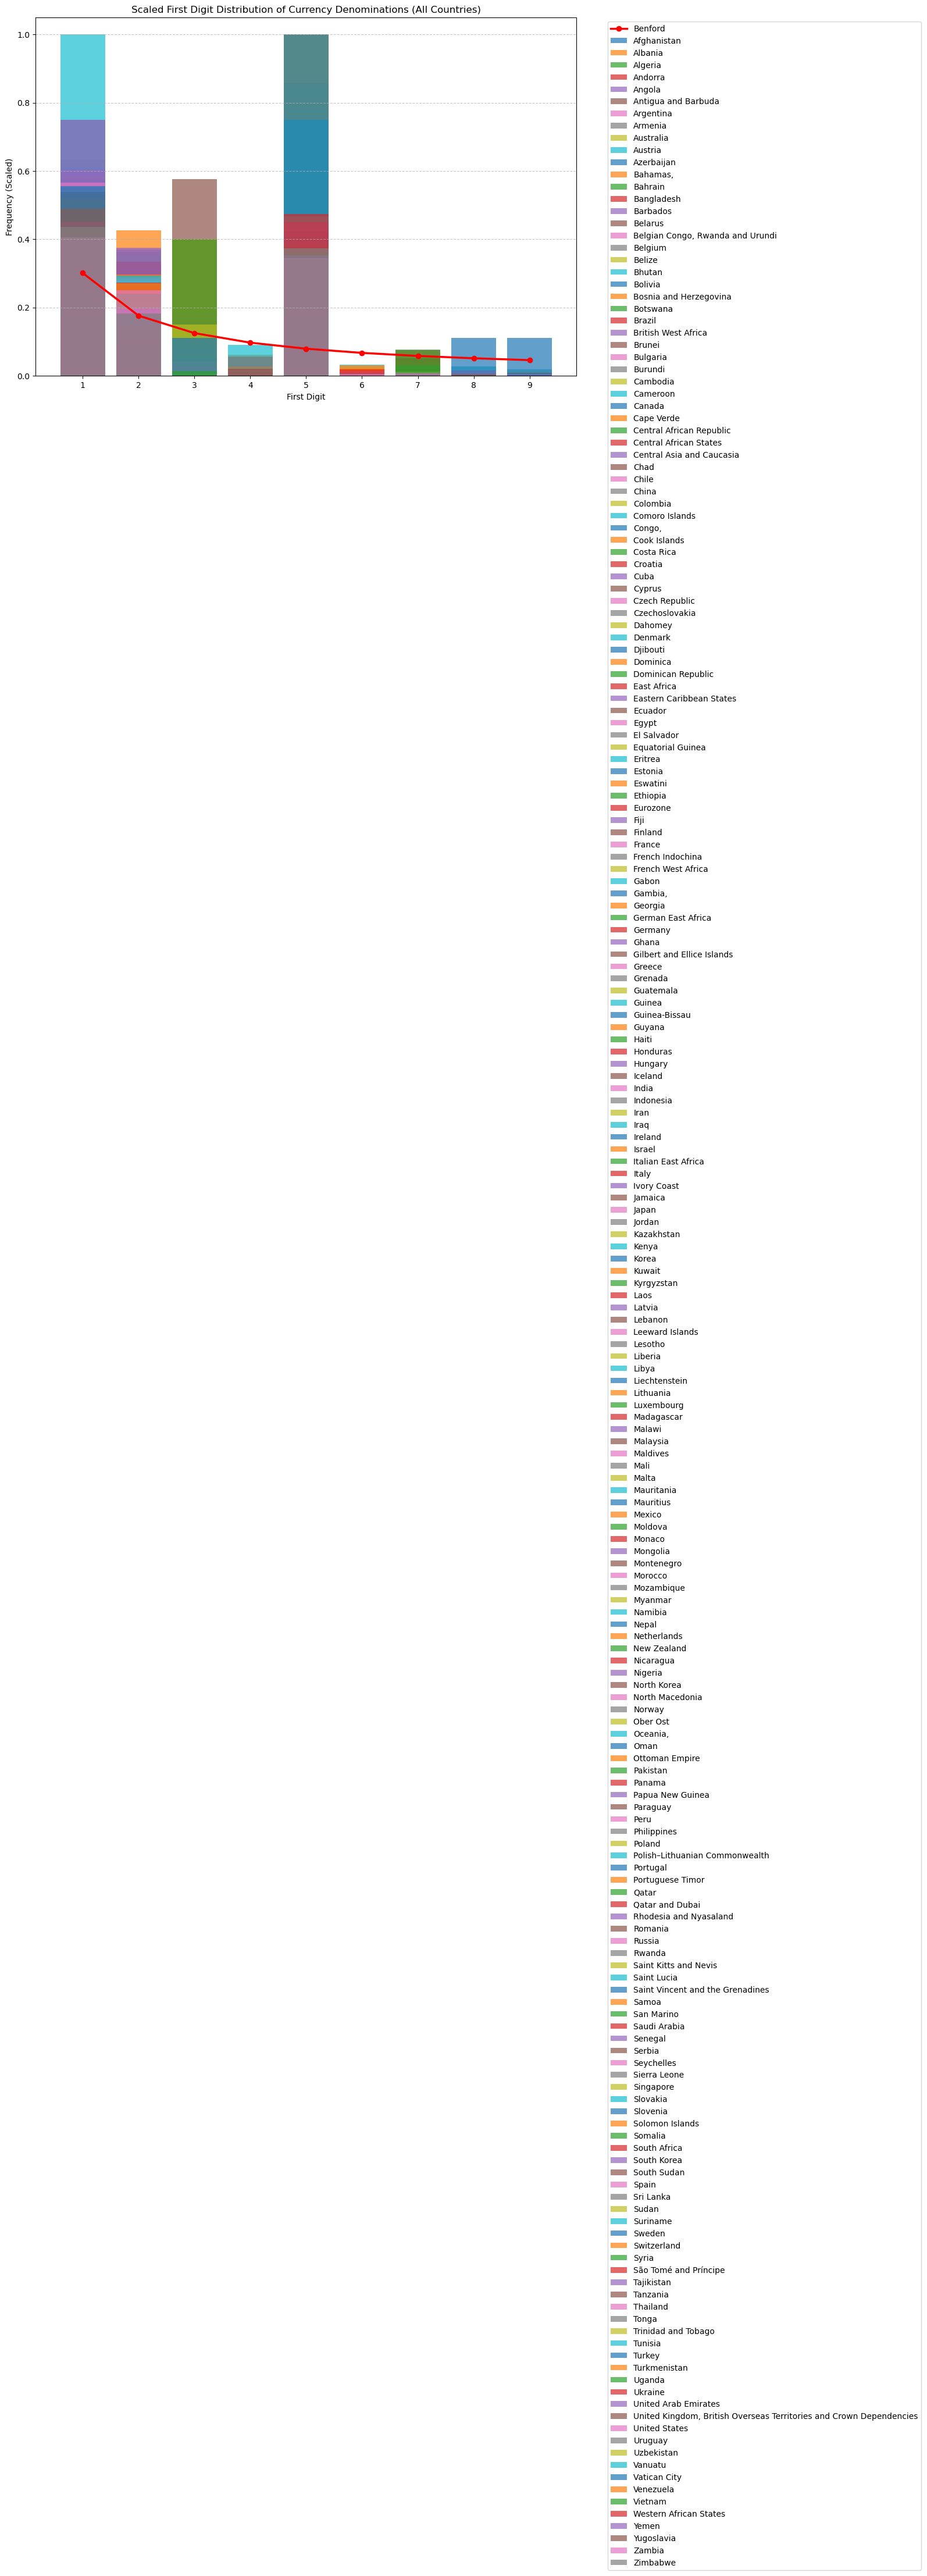

In [40]:
# Plot the scaled frequencies for all countries
plt.figure(figsize=(12, 8))
for country in scaled_data.index:
    plt.bar(scaled_data.columns, scaled_data.loc[country], alpha=0.7, label=country)

# Plot the expected frequencies from Benford's Law
plt.plot(range(1, 10), benford, color='r', marker='o', linestyle='-', linewidth=2.5, label='Benford')

plt.xlabel('First Digit')
plt.ylabel('Frequency (Scaled)')
plt.title('Scaled First Digit Distribution of Currency Denominations (All Countries)')
plt.xticks(range(1, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


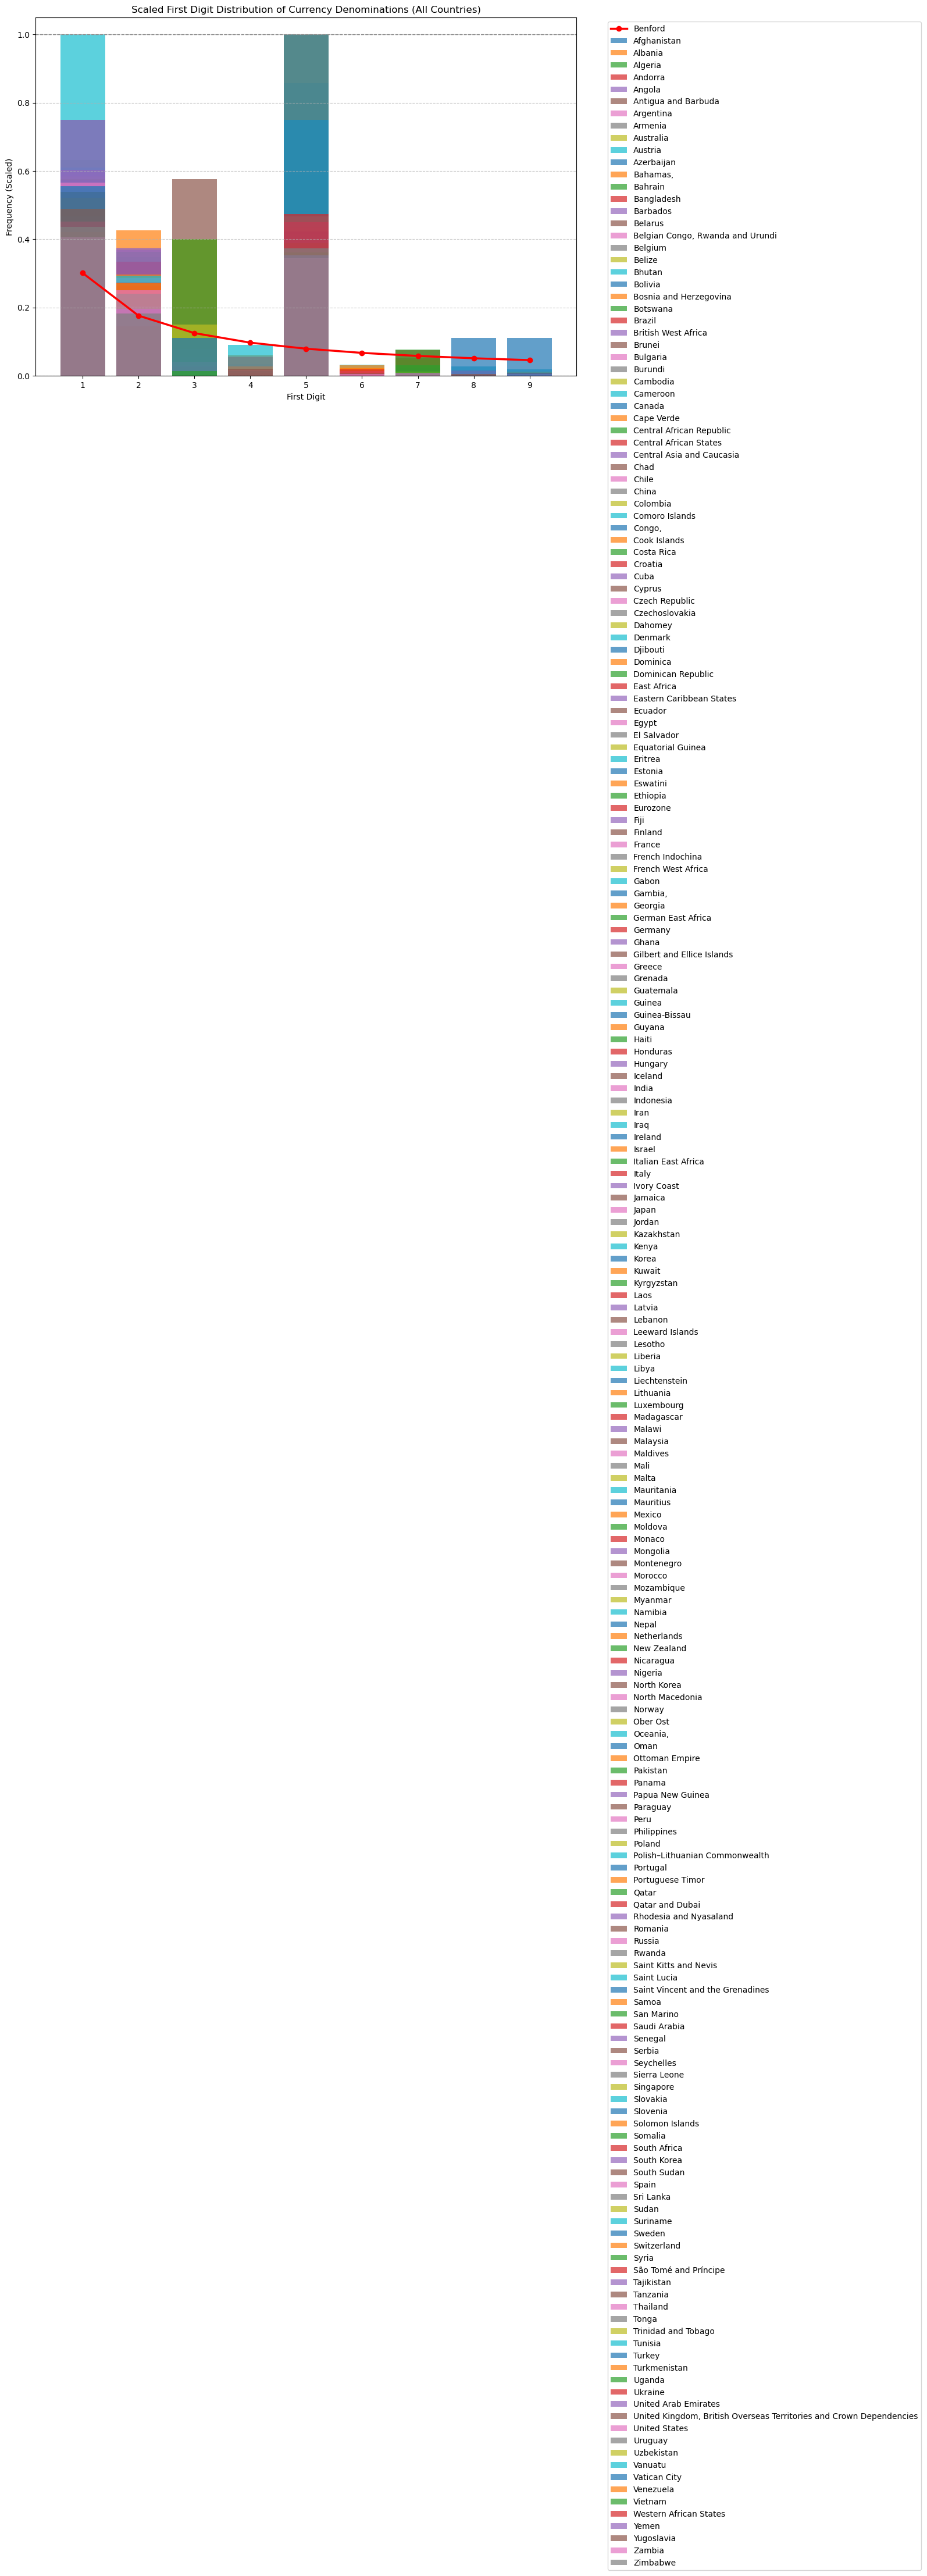

In [45]:
import math

# Calculate the expected frequencies from Benford's Law
benford = [math.log10(1 + 1/d) for d in range(1, 10)]

# Plot the scaled frequencies for all countries
plt.figure(figsize=(12, 8))
for country in scaled_data.index:
    plt.bar(scaled_data.columns, scaled_data.loc[country], alpha=0.7, label=country)

# Plot the expected frequencies from Benford's Law
plt.plot(range(1, 10), benford, color='r', marker='o', linestyle='-', linewidth=2.5, label='Benford')

plt.xlabel('First Digit')
plt.ylabel('Frequency (Scaled)')
plt.title('Scaled First Digit Distribution of Currency Denominations (All Countries)')
plt.xticks(range(1, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


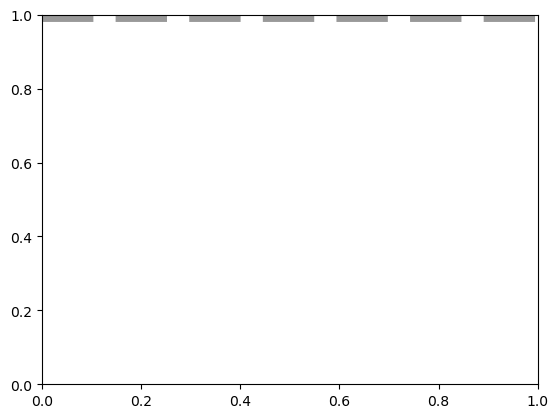